# Normal affine toric varieties in Oscar

In this notebook, we illustrate some of the functionalities of 'Oscar.jl' related to affine toric varieties. Mostly computations with *normal* affine toric varieties are supported. These are the toric varieties coming from rational polyhedral cones. The documentation can be found at

https://oscar-system.github.io/Oscar.jl/dev/ToricVarieties/NormalToricVarieties/.

This is based on a notebook kindly shared with me by Lars Kastner. 

## 0. Installing Oscar 

Let us start by loading Oscar. Since the toric geometry functions in Oscar are still under development, we will need to use the development version of the package. To this end, clone the Oscar git repository by entering

> git clone https://github.com/oscar-system/Oscar.jl.git

in the terminal, after navigating to the folder in which you want to place Oscar.jl. Next, replace the second line in the following cell with the path to this folder. 

In [17]:
using Pkg; Pkg.add("Oscar")
Pkg.develop(path=raw"/Users/Telen/Documents/Projects/Oscar.jl")
using Oscar

   Resolving package versions...
   Installed Hwloc_jll ──────────────────────── v2.5.0+0
   Installed SIMDDualNumbers ────────────────── v0.1.0
   Installed Static ─────────────────────────── v0.4.0
   Installed CPUSummary ─────────────────────── v0.1.6
   Installed LayoutPointers ─────────────────── v0.1.4
   Installed libpolymake_julia_jll ──────────── v0.4.116+0
   Installed HostCPUFeatures ────────────────── v0.1.5
   Installed PolyesterWeave ─────────────────── v0.1.2
   Installed SLEEFPirates ───────────────────── v0.6.28
   Installed ForwardDiff ────────────────────── v0.10.21
   Installed StaticArrays ───────────────────── v1.2.13
   Installed CloseOpenIntervals ─────────────── v0.1.4
   Installed StructArrays ───────────────────── v0.6.3
   Installed BitTwiddlingConvenienceFunctions ─ v0.1.1
   Installed ArrayInterface ─────────────────── v3.1.36
   Installed VectorizationBase ──────────────── v0.21.18
   Installed PrettyTables ───────────────────── v1.2.3
   Installed LoopVe

   Resolving package versions...
    Updating `~/Project.toml`
  [f213a82b] ↓ HomotopyContinuation v2.6.0 ⇒ v1.4.4
  [f1435218] ~ Oscar v0.5.2 ⇒ v0.6.1-DEV `/Users/Telen/Documents/Projects/Oscar.jl`
  [d720cf60] ↑ Polymake v0.5.6 ⇒ v0.6.0
    Updating `~/Manifest.toml`
  [c3fe647b] ↑ AbstractAlgebra v0.16.0 ⇒ v0.22.2
  [fb37089c] - Arblib v0.4.2
  [4fba245c] - ArrayInterface v3.1.36
  [62783981] - BitTwiddlingConvenienceFunctions v0.1.1
  [2a0fbf3d] - CPUSummary v0.1.6
  [fb6a15b2] - CloseOpenIntervals v0.1.4
  [bbf7d656] - CommonSubexpressions v0.3.0
  [163ba53b] - DiffResults v1.0.3
  [b552c78f] - DiffRules v1.3.1
  [497a8b3b] + DoubleFloats v1.1.24
  [e2ba6199] + ExprTools v0.1.6
  [6a86dc24] - FiniteDiff v2.8.1
  [3dd14ad9] + FixedPolynomials v0.4.0
  [f6369f11] - ForwardDiff v0.10.21
  [c863536a] ↑ GAP v0.5.2 ⇒ v0.7.0
  [14197337] + GenericLinearAlgebra v0.2.7
  [d5909c97] + GroupsCore v0.4.0
  [3e1990a7] ↑ Hecke v0.10.5 ⇒ v0.10.23
  [f213a82b] ↓ HomotopyContinuation v2.6.0 ⇒ v1.4

## 1. Cones

Here's how to make a 2-dimensional cone generated by the vectors $(-2,5)$ and $(1,0)$. 

In [18]:
σ = positive_hull([-2 5; 1 0])

A polyhedral cone in ambient dimension 2

We can inspect its rays:

In [19]:
rays(σ)

2-element VectorIterator{RayVector{Polymake.Rational}}:
 [-1, 5/2]
 [1, 0]

and its facet inequalities:

In [20]:
facets(σ)

2-element HalfspaceIterator{Halfspace}:
 The Halfspace of R^2 described by
1: -5*x₁ - 2*x₂ ≦ 0

 The Halfspace of R^2 described by
1: -x₂ ≦ 0


The coordinate ring of the associated affine toric variety is the ring over the semigroup defined by the *dual* cone $\sigma^\vee$:

In [21]:
σⱽ = Cone(Polymake.polytope.polarize(σ.pm_cone))

A polyhedral cone in ambient dimension 2

Here's how to visualize it: 

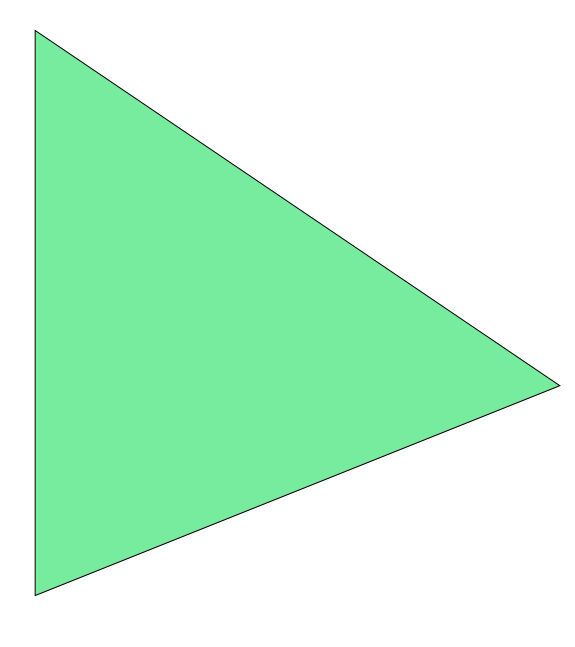

In [22]:
visualize(σⱽ)

Here's how you intersect cones: 

In [23]:
C0 = positive_hull([1 0; 1 1])
C1 = positive_hull([1 1; 0 1])
C01 = intersect(C0, C1)

A polyhedral cone in ambient dimension 2

The resulting cone 'C01' is a 1-dimensional cone in a 2-dimensional ambient vector space:

In [24]:
dim(C01)

1

## 2. Embedding $U_\sigma$

The cone $\sigma^\vee$ defines a saturated affine semigroup $S_\sigma$ whose minimal generators are called the *Hilbert basis*:

In [29]:
A = hilbert_basis(σⱽ)

4-element VectorIterator{PointVector{Polymake.Integer}}:
 [5, 2]
 [0, 1]
 [2, 1]
 [1, 1]

This gives an embedding of $U_\sigma$ in $\mathbb{C}^4$ via 
$$ (\mathbb{C}^*)^2 \rightarrow \mathbb{C}^4 \quad \text{ where }  \quad (t_1, t_2) \mapsto( t_1^5t_2^2, t_2, t_1^2t_2, t_1t_2).$$
The closure of the image is cut out by binomials. Here's how to find them using Oscar: 

In [30]:
σⱽ.pm_cone.CONE_TORIC_IDEAL.BINOMIAL_GENERATORS

pm::Matrix<long>
-1 -1 2 1
-1 0 3 -1
0 -1 -1 2


The rows of this matrix translate into the binomials 
$$ xy - z^2w,~ xw - z^3,~ yz-w^2. $$

## 3. Properties

In [33]:
Y = NormalToricVariety(σ)

A normal toric variety corresponding to a polyhedral fan in ambient dimension 2

In [12]:
issmooth(Y)

false

In [13]:
isnormal(Y)

true

In [14]:
dim(Y)

2

In [15]:
issimplicial(Y)

true

In [28]:
isaffine(Y)

true